# Project Draft
## Team ID: 62, Paper: 18
### Group Members:
* Minjia Zhu (minjiaz2@illinois.edu)
* Eddie Rodriguez (er17@illinois.edu)
* Yong Yang (yongy3@illinois.edu)

---

#### **Team 62 Github Repo:** https://github.com/JerryYangSH/cs598-dl4h-project
#### Paper 18 Link: https://proceedings.mlr.press/v182/gao22a/gao22a.pdf
#### Original Github Repo: https://github.com/autonlab/KeyClass


# 1. Introduction

The Electronic Health Record (EHR) system has revolutionized the way patient data is stored and accessed within the healthcare sector. With the increasing adoption of EHR systems, there is a growing need for efficient and accurate methods to process and analyze the vast amount of unstructured clinical text contained within these records. One particular challenge is the assignment of International Classification of Diseases (ICD) codes to patient diagnoses, a process that is currently manual, time-consuming, and prone to errors. ICD-9 defines more than 14,000 unique codes, and often times patients are assigned more than one code when being diagnosed (WHO, 1988). The issue boils down to a multiclass and multilabel machine learning task.

As mentioned in the article "Artificial Intelligence in Helathcare", the use of AI applications may reduce the United States' annual healthcare costs by approximately 150 billion USD come 2026. By streamlining something as ubiquotous as clinical text into patient diagnoses without the need for human intervention, the healthcare sector could better utilize their workforce on tasks that are less menial.

The paper "Classifying Unstructured Clinical Notes via Automatic Weak Supervision" introduces KeyClass, a novel weakly-supervised text classification framework that leverages pre-trained language models and data programming to automatically assign high-level ICD-9 codes to clinical notes. This approach eliminates the need for human-labeled data via training signals that include descriptors of the ICD codes, making the classification process more efficient and scalable. Previous attempts of weak supervision relied upon manually created rule-based labeling functions. Whereas, KeyClass uses keyword-matching from referenced datasets such as IMDb movie reviews with both negative and positive target keywords to train the model's labeling function with little to no human intervention.

KeyClass was shown to outperform the weakly-supervised model, FasTag (Venkataraman et el., 2020), in assigning ICD-9 codes,  measured by metrics such as recall by 12.8% (0.896±0.0009), precision by 16.3% (0.507±0.0016), and F1-score by 19.1% (0.6252±0.0014). The paper also considered the fully-supervised FasTag model, where KeyClass demonstrated similar performance in terms of recall, precision, and F1 score. With some further exploration, KeyClass may be the definitive solution to the clinical note transcription problem. In the following sections we plan to implement, analyze, and interpret the results of the KeyClass model.

# 2. Methodology

The following packages used in reproducing the KeyClass model:

In [ ]:
# import  packages needed via Google Drive
from google.colab import drive
drive.mount('/content/drive')

# clone KeyClass GitHub Repo
!git clone https://github.com/JerryYangSH/KeyClass.git
%cd KeyClass
!git pull

# install package dependencies
!pip install pytorch
!pip install cudatoolkit
!pip install snorkel==0.9.8
!pip install tokenizers==0.10.3
!pip install transformers==4.11.3
!pip install sentence-transformers==2.2.2
# !pip install jupyter notebook
!pip install snorkel


##  2.1 Data

Based on the original paper, two general classes of data are needed: ICD codes, as well as EHR data, more specifically clinical notes. We extract keywords from a handful of datasets in order to run our labeling functions and eventually classify our EHR data.

We will utilize the publicly available MIMIC-III database, containing de-identified clinical notes alongside diagnostic codes (ICD), to evaluate the effectiveness of KeyClass.


*   MIMIC-III: free-text discharge summaries and corresponding ICD-9 codes recorded in the Medical Information Mart for Intensive Care (MIMIC-III) dataset (Johnson et al., 2016)
    *   Utilize de-identified clinical data from over 40,000 patients amitted to the critical care units of Beth Israel Deaconess Medical Center at Harvard Medical School between 2001 to 2012
    *   Our group will use the 70-30 train-test split and 19 top-level ICD-9 categories used in the original paper.
*   Keyword labeling functions produced from the following datasets:
AGNEWS, DBPedia, IMDb, and Amazon.


In [ ]:
# directory containing data processing scripts
%cd /content/drive/MyDrive/KeyClass/scripts
%ls

# download, zip, and process data for train and test labels
!bash get_data.sh

##   2.2 Model
KeyClass consists of the following components:
Class Descriptions and Keyword Extraction, Labeling Function and Probabilistic Labeling, Training Model.

Class Descriptions and Keyword Extraction:

* KeyClass extracts relevant keywords and phrases from the unlabeled text from the aforementioned datasets.

Labeling Function and Probabilistic Labeling:
* Extracted keywords are used to create simple, interpretable labeling functions.
* A label model aggregates the outputs of the labeling functions to generate probabilistic labels for the training data.

Downstream Classifier:
* A downstream classifier is trained on the probabilistically labeled data to perform the final classification task.

In [ ]:
# run and train the model on the MIMIC-III dataset
!python run_all.py --config ../config_files/config_mimic3.yml

## 2.3 Training

A local CPU may be used for functional validation of the KeyClass model. However, utilization of a GPU via AWS or Colab is preferred for traning efficiency. Our team used  Google's A100 or T4 GPU for training within the Colab Pro envrionment.

## 2.4 Evaluation (Metric descriptions and Implementation code)
The performance of KeyClass will be evaluated via precision, recall, and F1 score for the ICD-9 code assignment task. For other text classification tasks, accuracy will be the primary evaluation metric. Comparisons will be made with other weakly-supervised models and a fully supervised baseline, such as those from the original paper.

# 3. Results
The following sections detail the performance of KeyClass on the ICD-9 code assignment task, including comparisons with other models. Additionally, results from applying KeyClass to other text classification tasks will be presented to demonstrate its generalizability.

## 3.1 Results
*   Our itent is to validate the metrics presented in the original paper, specifically the aforementioned metrics (precision, recall, and F1 score):

  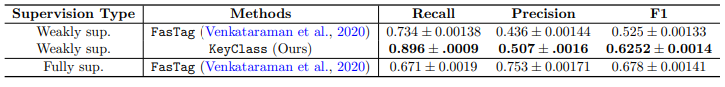

  We intend to run through each of the datasets provided in our config_files folder. These datasets obtain our labeling functions and train the label models for use with the MIMIC-III data. Tuning of the training model will be done by comparing the performance metric's using the LeakyReLU activation agaist Parametrics ReLU, and Randomized ReLU. Through the use of Colab Pro's GPUs, our hope is that the tuned models will be run and perform similar to the original model. After training and tuning is complete, we will set up a metric calculator function comparing recall, precision, and F1 scores.

## 3.2 Analyses
We will interpret the results after running KeyClass, and expound on how this model may be generalized. Our main focus will be how the trained models perform on the MIMIC-III data.

## 3.3 Plans

Testing and report results for our experiments will be provided in this section.



## Model comparison

We intend to compare our results from those provided in the weakly supervised FasTag (Venkataraman et al., 2020), and the fully supervised FasTag. If we can reproduce the results this will be a confirmation of the paper's performance metric results.

# Discussion

Given our intent to reproduce the results of the original paper we will discuss both the difficulties encountered during production, as well as items that were favorable.

The original paper highlights KeyClass's model limitations on classifying low-resource categories. We plan on examining potential solutions for obtaining these low-resource categories. However, at first glance it appears the solution to this problem requires more robust data obtained from a larger corpus of de-identified clinical notes. The de-identification provided from the MIMIC-III database poses a challenge, along with garnering participation from more hospitals willing to share their clinical notes.



# References

1. Gao, C., Goswami, M., Chen, J., Dubrawski, A. "Classifying Unstructured Clinical Notes via Automatic Weak Supervision." Proceedings of Machine Learning Research, 2022, 182:679-690

2. Bohr, Adam, and Kaveh Memarzadeh. “The Rise of Artificial Intelligence in Healthcare Applications”, Artificial Intelligence in Healthcare, 2020, 25-60, doi:10.1016/B978-0-12-818438-7.00002-2



